# Simple Linear Regression in Python from Scratch

## Step 1: Importing the necessary libraries

In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Step 2: Let's import the dataset

In [32]:
dataset = pd.read_csv('Salary_Data.csv')
print(dataset)
X = dataset.iloc[:,[0]].values
Y = dataset.iloc[:,[1]].values

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


### Let's plot the X and Y values and see the nature of our dataset

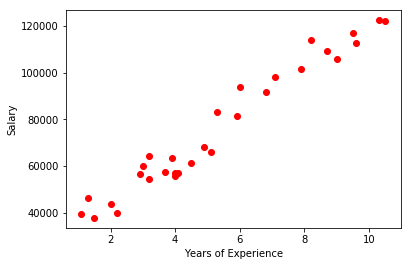

In [33]:
plt.scatter(X,Y,c='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### The dataset seems Linear. So it is preferred to use Linear Regression.
![SLR1](images/SLR1.png)

### Where Y is our output(Salary) and X is our input(Years of Experience)
### When we have only one input attribute, we use Simple Linear Regression.
### When there are more than one input attributes, we use Multiple Linear Regression.

### In Simple Linear Regression, we have to calculate B0(Bias) and B1(Coefficient) in such a way that there is least possible error.

## Method 1: Ordinary Least Squares(OLS)

### The formula for calculating B0 and B1 is given below. This method is called Ordinary Least Squares Method.

![SLR2](images/SLR2.png)

![SLR3](images/SLR3.png)


In [34]:
mean_X = np.sum(X)/len(X)
mean_Y = np.sum(Y)/len(Y)

b1_numerator = np.sum((X-mean_X)*(Y-mean_Y))
b1_denom = np.sum(np.square(X-mean_X))

b1 = b1_numerator/b1_denom

b0 = mean_Y - b1*mean_X

y_pred = b0 + b1*X

### Here, y_pred represents the prediction values from our regressor.

### Let's plot the regression line.

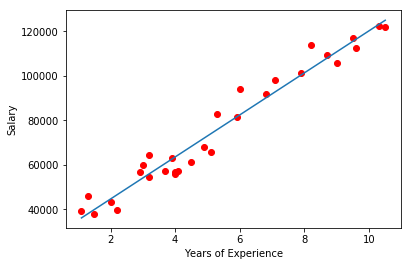

In [35]:
plt.scatter(X,Y,c='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.plot(X,y_pred)
plt.show()

### Now, let's cross verify if our model is correct by using Sklearn

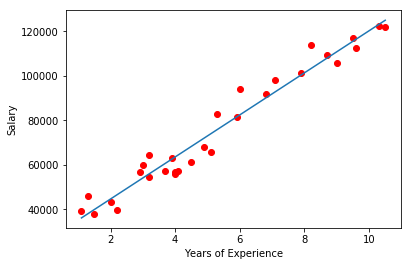

In [36]:
regressor = LinearRegression()
regressor.fit(X,Y)
y_pred_sklearn = regressor.predict(X)

plt.scatter(X,Y,c='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.plot(X,y_pred_sklearn)
plt.show()

### Seems correct!

### Let's estimate the errors.
### For calculating the error, we will be using RMSE(Root Mean Squared Error)

![SLR4](images/SLR4.png)


In [37]:
sumsqr = np.sum(np.square(y_pred -Y))
n = len(Y)
rmse = np.sqrt(sumsqr/n)
print(rmse)

5592.043608760662


### This says, on an average, our predictions were wrong by 5592 rupees

### Congratulations on completing Simple Linear Regression!

## Method 2: Stochastic Gradient Descent

### For this, we initialize B0 and B1 to 0 or a small random value.

### For each value of X and Y, we calculate error as
![SLR5](images/SLR5.png)

### And update B0 and B1 respectively as
![SLR6](images/SLR6.png)
![SLR7](images/SLR7.png)

### Where, alpha is the Learning Rate. Learning Rate is the rate at which you want to change the values of B0 and B1.

### We are going through the dataset for 100 times i.e 100 epochs. This will give the algorithm to learn on the dataset and give the least possible error.

### Both Learning Rate and Epochs are Hyper Parameters i.e you can change them as per your need to tune your model.

In [38]:
B0 = 0.0
B1 = 0.0
learning_rate = 0.01
epochs = 100
rmse_scores = []
for i in range(epochs):
    for i in range(len(Y)):
        y_pred = B0 + B1*X[i][0]
        error = y_pred - Y[i][0]
        B0 = B0 - learning_rate*error
        B1 = B1 - learning_rate*error*X[i][0]
        
    y_pred = B0 + B1*X

    sumsqr = np.sum(np.square(y_pred -Y))
    n = len(Y)
    rmse = np.sqrt(sumsqr/n)
    rmse_scores.append(rmse)
y_pred = B0 + B1*X


sumsqr = np.sum(np.square(y_pred -Y))
n = len(Y)
rmse = np.sqrt(sumsqr/n)

print("RMSE score: "+ str(rmse))

RMSE score: 5824.301934056656


### Let's plot the rmse scores per epoch, to see how our model is learning

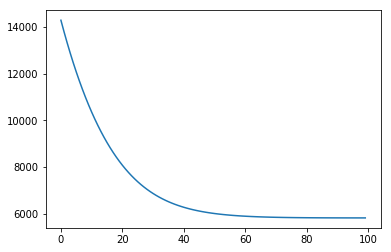

In [39]:
plt.plot(rmse_scores)
plt.show()

### We can see the error is decreasing as the epochs are increasing. This shows that our implementation is correct.
### Let's plot the y_pred line

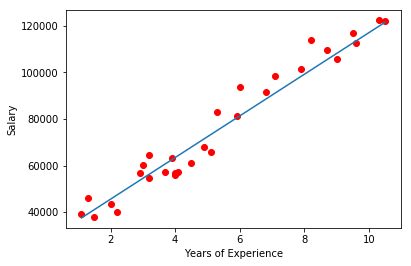

In [30]:
plt.scatter(X,Y,c='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.plot(X,y_pred)
plt.show()

### Congratulations on completing Simple Linear Regression!